# 빈도 분석
<!-- 5-1 -->


In [35]:
import sys
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shapely.geometry import Polygon
from scipy.stats import multivariate_normal

Barplot의 기본과 변형을 알아보겠습니다. 먼저 빈도가 표시된 데이터를 만듭니다. 

In [36]:
x = np.arange(4)
years = ['2019', '2020', '2021', '2022']
values1 = [340, 222, 850, 488]

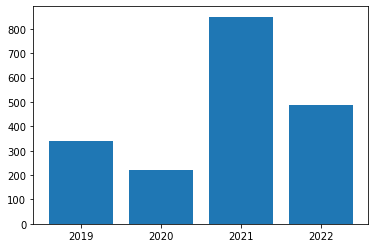

In [37]:
#%% 기본 막대 그래프
plt.bar(x, values1)
plt.xticks(x, years)
plt.show()

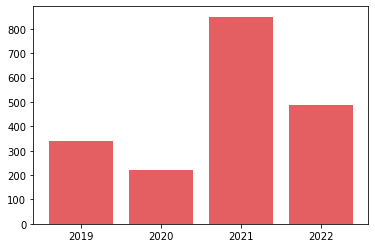

In [38]:
#%% color code를 이용한 색 지정
plt.bar(x, values1, color='#e35f62')
plt.xticks(x, years)
plt.show()

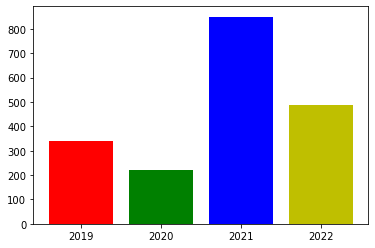

In [39]:
#%% bar 마다 다르게 색 지정
plt.bar(x, values1, color=["r", "g", "b", "y"])
plt.xticks(x, years)
plt.show()

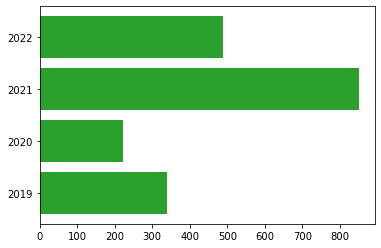

In [40]:
#%% 수평 막대 그래프
plt.barh(x, values1, color="C2")
plt.yticks(x, years)
plt.show()

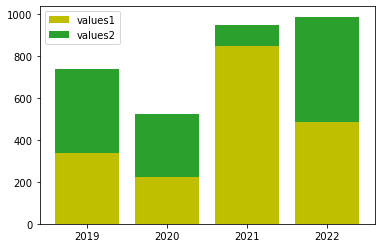

In [41]:
#%% 스택 막대 그래프
values2 = [400, 300, 100, 500]
p1 = plt.bar(x, values1, color='y')
p2 = plt.bar(x, values2, color='C2', bottom=values1)

plt.xticks(x, years)
plt.legend((p1[0], p2[0]), ('values1', 'values2'))
plt.show()

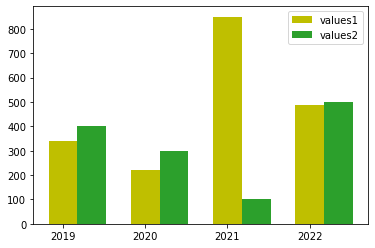

In [42]:
#%% Dodged 막대 그래프
bar_width = 0.35

p1 = plt.bar(x, values1, bar_width, color='y', label='values1')
p2 = plt.bar(x + bar_width, values2, bar_width, color='C2', label='values2')

plt.xticks(x, years)
plt.legend((p1[0], p2[0]), ('values1', 'values2'))

객체 타입: <class 'matplotlib.container.BarContainer'>
막대의 갯수: 4


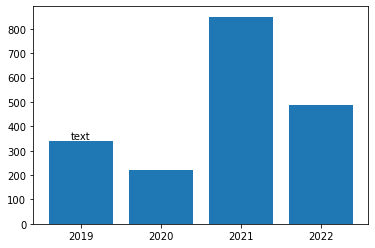

In [43]:
'''5-1-2 bar 위에 text의 표시'''
bar = plt.bar(x, values1)
plt.xticks(x, years)

print(f"객체 타입: {type(bar)}")
print(f"막대의 갯수: {len(bar)}")

select_bar = bar[0]
plt.text(
   x=select_bar.get_x() + select_bar.get_width()/2.0,
   y=select_bar.get_height(),
   s="text",
   ha='center', va='bottom'
   )
plt.show()

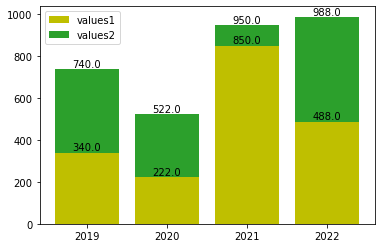

In [44]:
#%%
p1 = plt.bar(x, values1, color='y')
for rect in p1:
   height = rect.get_height()
   plt.text(
      x=rect.get_x() + rect.get_width()/2.0,
      y=height,
      s='%.1f' % height,
      ha='center', va='bottom'
      )

p2 = plt.bar(x, values2, color='C2', bottom=values1)
for i, rect in enumerate(p2):
   height = rect.get_height() + p1[i].get_height()
   plt.text(
      x=rect.get_x() + rect.get_width()/2.0,
      y=height,
      s='%.1f' % height,
      ha='center', va='bottom'
      )

plt.xticks(x, years)
plt.legend((p1[0], p2[0]), ('values1', 'values2'))
plt.show()

In [45]:
'''5-1-3 barplot을 이용한 자전거 수요 데이터 시각화'''
df = pd.read_csv("http://ranking.uos.ac.kr/class/VIS/data/bike_demand.csv", parse_dates=["datetime"])

In [46]:
print(df.head(5))
print(df.info())

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    108

In [47]:
print("=====Missing Rate=====")
for col in df.columns:
   missing_ratio = df[col].isnull().sum() / len(df[col])
   print(f"{col}: {round(missing_ratio, 2)}%")

#%%
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df["dayofweek"] = df["datetime"].dt.dayofweek

=====Missing Rate=====
datetime: 0.0%
season: 0.0%
holiday: 0.0%
workingday: 0.0%
weather: 0.0%
temp: 0.0%
atemp: 0.0%
humidity: 0.0%
windspeed: 0.0%
casual: 0.0%
registered: 0.0%
count: 0.0%


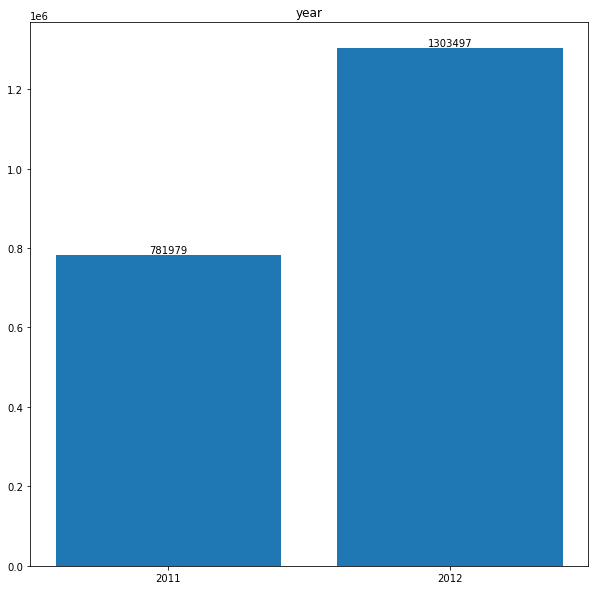

In [48]:
col = "year"
fig, ax = plt.subplots(figsize=(10, 10), facecolor="white")
x = df.groupby(col)["count"].sum().index.tolist()
y = df.groupby(col)["count"].sum().tolist()
bar = ax.bar(x, y)
ax.set_xticks(x)
ax.set_title(col)

for rect in bar:
   height = rect.get_height()
   plt.text(
      x=rect.get_x() + rect.get_width()/2.0,
      y=height,
      s=height,
      ha='center', va='bottom'
      )

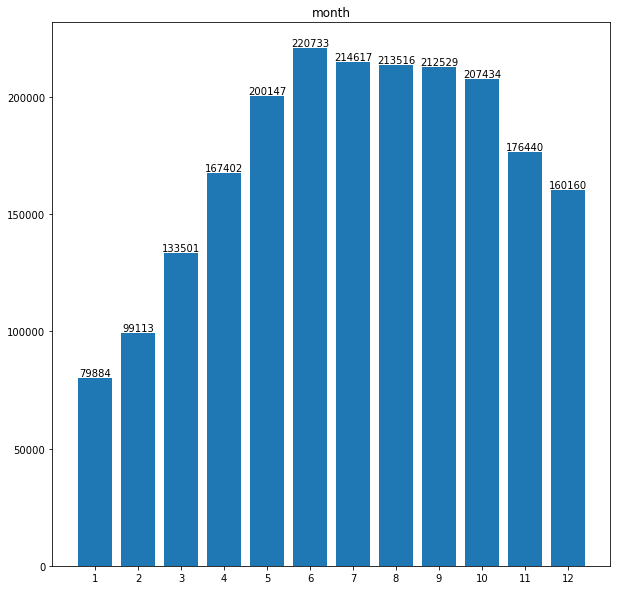

In [49]:
col = "month"
fig, ax = plt.subplots(figsize=(10, 10), facecolor="white")
x = df.groupby(col)["count"].sum().index.tolist()
y = df.groupby(col)["count"].sum().tolist()
bar = ax.bar(x, y)
ax.set_xticks(x)
ax.set_title(col)

for rect in bar:
   height = rect.get_height()
   plt.text(
      x=rect.get_x() + rect.get_width()/2.0,
      y=height,
      s=height,
      ha='center', va='bottom'
      )